# Insurance Claims- Fraud Detection

### Problem statement:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install imblearn

In [3]:
!pip install xgboost

In [4]:
#importing data
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
#checking the shape of the dataset
df.shape

(1000, 40)

In [6]:
#checking the datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#checking the null vlaues
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

there is no any missing values in this dataset, only _c39 havenull values

In [8]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [9]:
# before dropping these '?' values we are converting those into NaN values
df = df.replace('?',np.NaN)

In [10]:
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

there are missing values in collision_type, property_damage, police_report_available, _c39 columns.

In [12]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [13]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [14]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [15]:
df['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [16]:
## We have repalce the collision type with the mode value
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
## We have replace the property damage info as no for nan values                                                  
df['property_damage']=df['property_damage'].replace(np.nan,'NO')
## We also repalce NO with nan values where police report had ? in our dataset.                                                 
df['police_report_available']=df['police_report_available'].replace(np.nan,'NO')
# we repalced _c39 because it all contain null values
df=df.drop(['_c39'],axis=1)

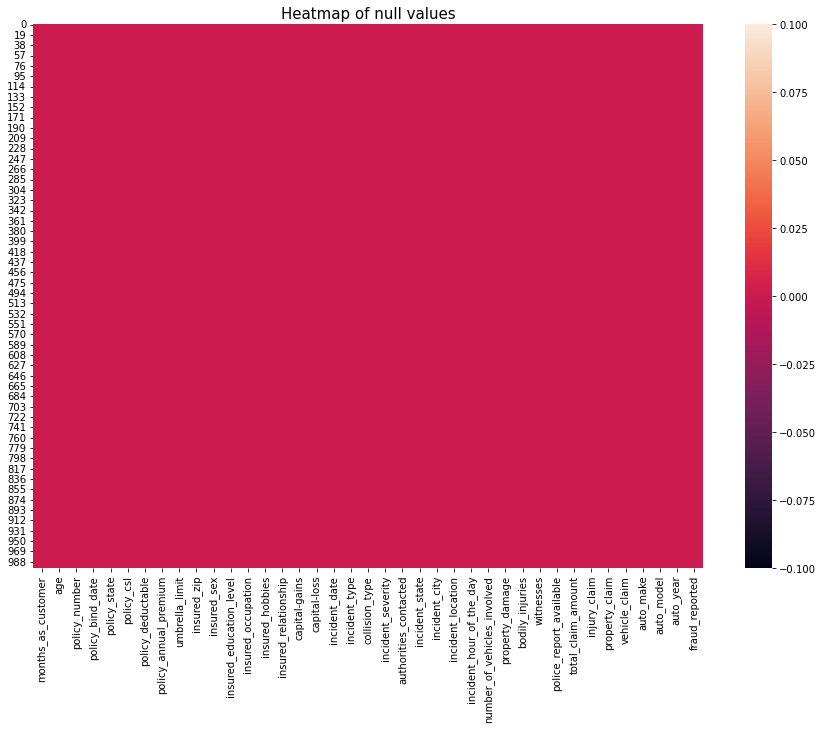

In [17]:
# ploting heatmap for null values check
plt.figure(figsize=(15,10))
plt.title('Heatmap of null values',fontsize=15)
sns.heatmap(df.isnull());

In [18]:
## Checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [19]:
## Creating a new feature for vehicle age
df['vechicle_age']=2021-df['auto_year']

In [20]:
## let's delete unnecassary columns
df=df.drop(['policy_number','insured_zip','incident_location','auto_year','policy_bind_date','policy_state','incident_date'],axis=1)

In [21]:
## Selecting object data type
do=df.select_dtypes(include='object')

In [22]:
for i in do:
    print('--------------',i,'---------------------------')
    print(do[i].value_counts())

-------------- policy_csl ---------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
-------------- insured_sex ---------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
-------------- insured_education_level ---------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
-------------- insured_occupation ---------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
-------------- insured_hobbies ---------------------------
reading     

In [23]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vechicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,15.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,6.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,11.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,16.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,21.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,26.000000


1. There is no missing value present in numerical data.

2. Minimum age is 19 and maximum age is 64.

3. Policy number is the unique id that we will drop as it is not required.

4. policy_deductable is a discrete data.

5. Minimum annual premium is 433.33 and maximum annual premium is 2047.59

6. Minimum Umbrella limit is showing negative numbers, we need to analyze that once again.

7. number_of_vehicles_involved, bodily_injuries, witnesses features are containing discrete data.

### Data Visulization

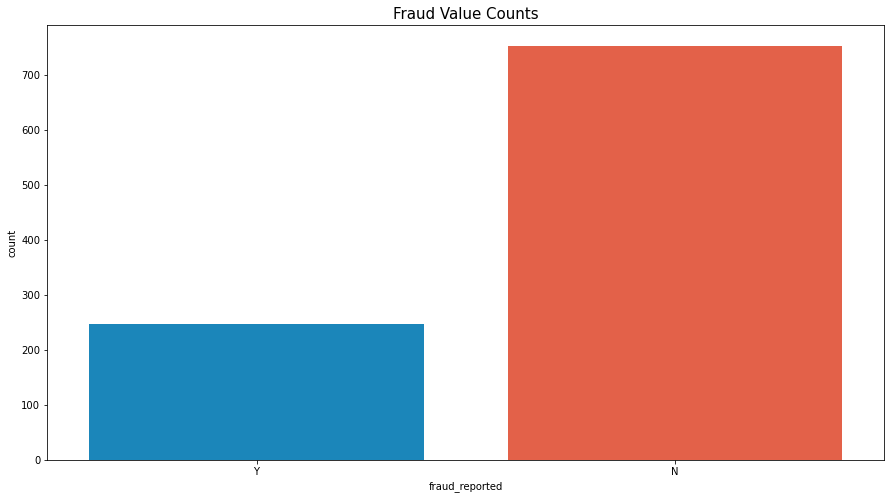

In [24]:
plt.figure(figsize=(15,8))
plt.title('Fraud Value Counts',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['fraud_reported'], data=df);

In [25]:
def value_count(df,col):
    plt.figure(figsize=(15,8))
    plt.title(col+' no of counts',fontsize=15)
    plt.style.use('fivethirtyeight')
    sns.countplot(df[col], data=df)

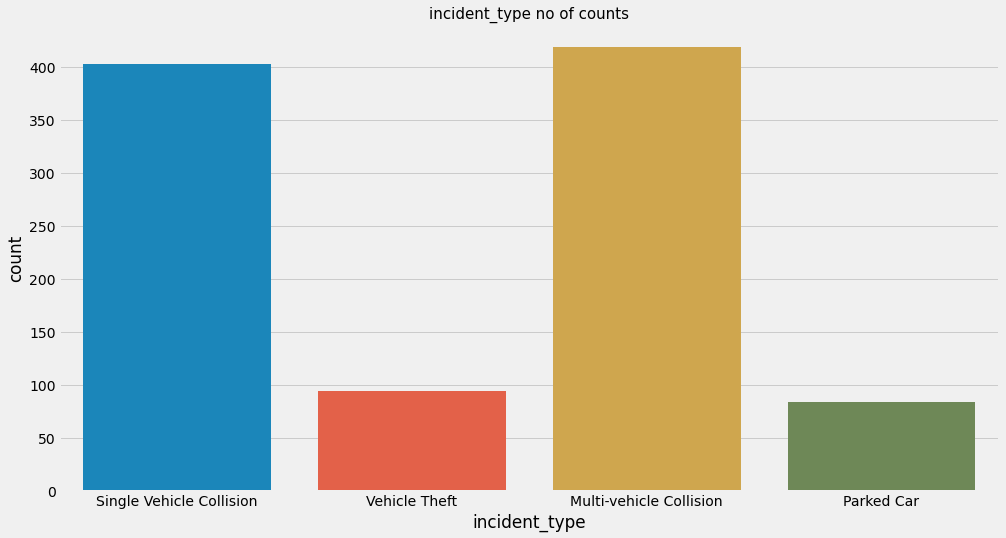

In [26]:
value_count(df,'incident_type')

In accident type, Multi vehicle collision is major issue.

Majority of insurance claimed for accidental vehicle. fer for theft vehicle.

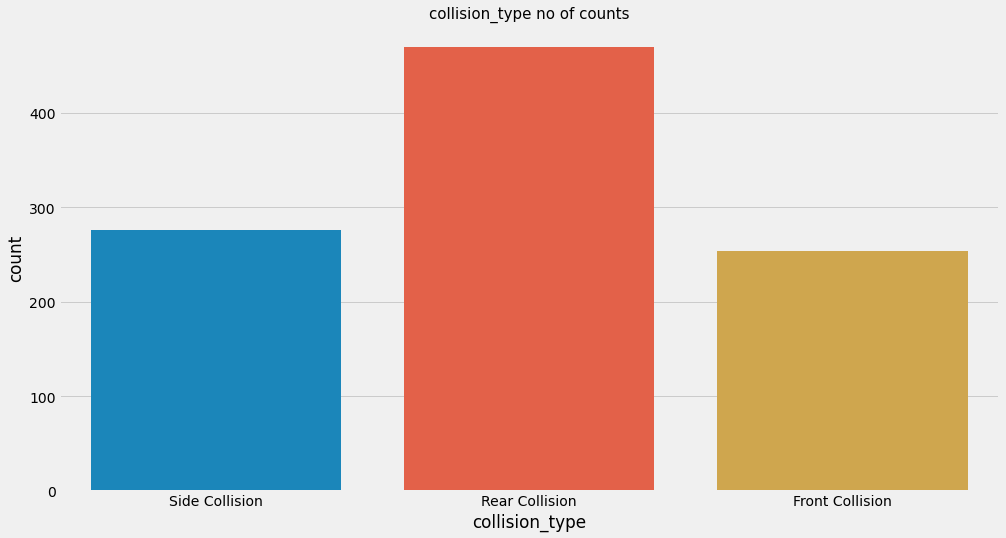

In [27]:
value_count(df,'collision_type')

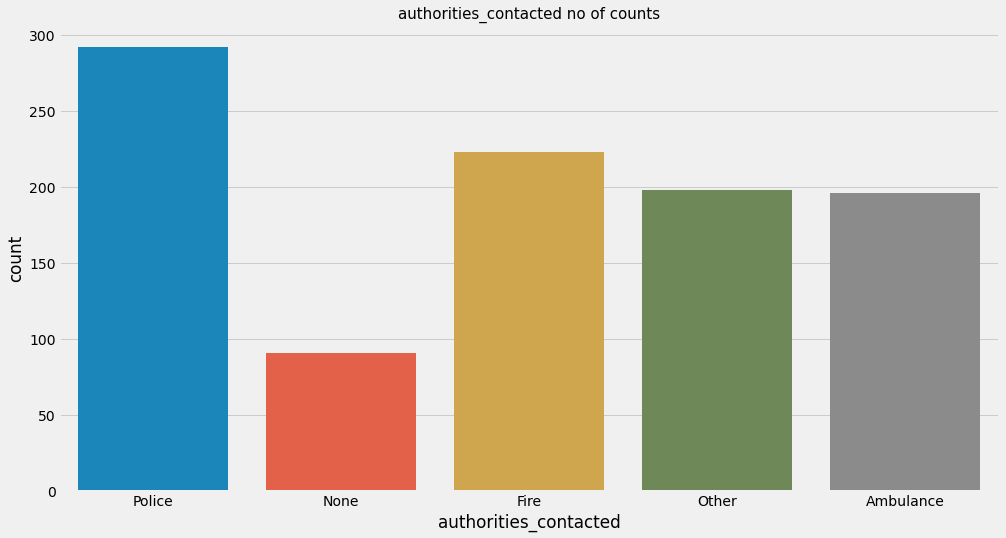

In [28]:
value_count(df,'authorities_contacted')

most of cases, vehicle owner called to police first.

Fire after the collision may be a 2nd prime reason.

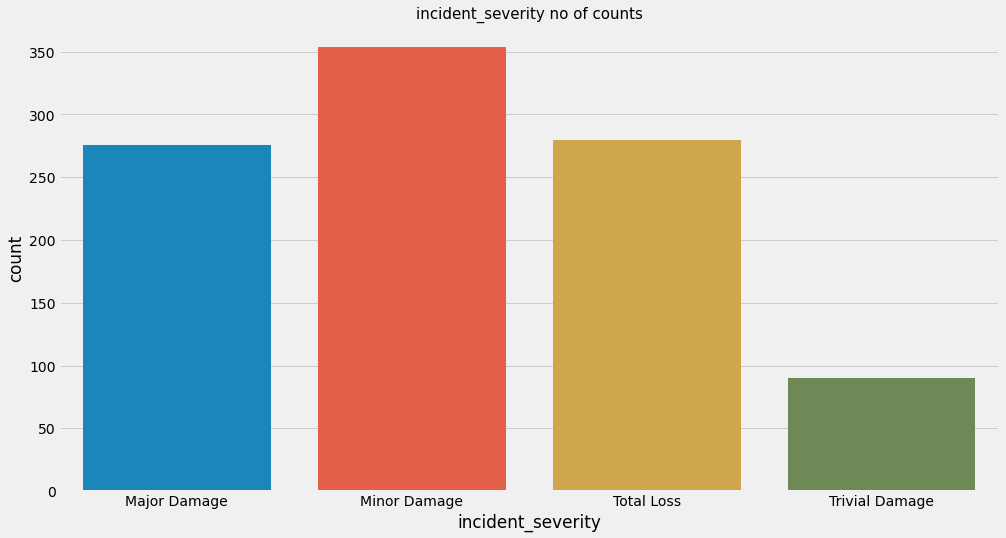

In [29]:
value_count(df,'incident_severity')

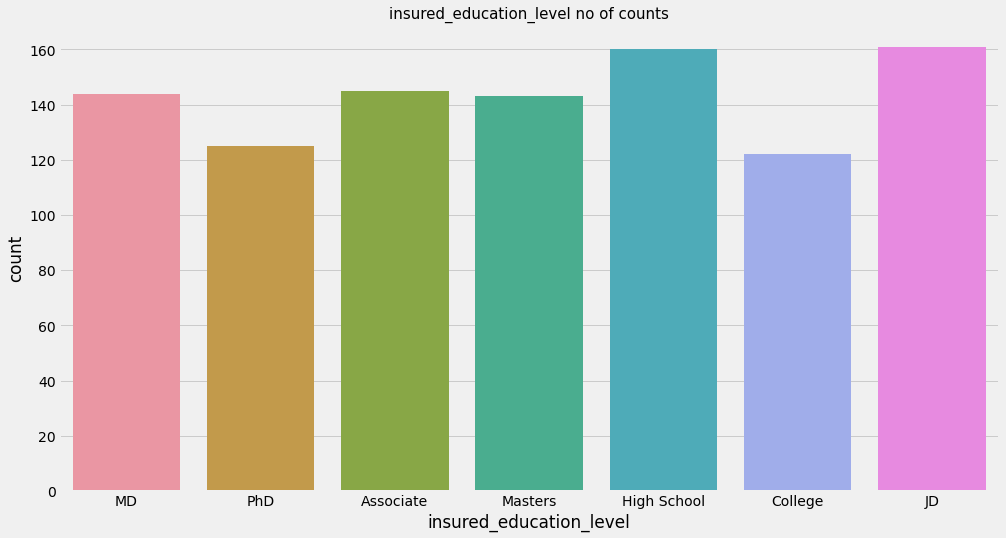

In [30]:
# Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported
value_count(df,'insured_education_level')

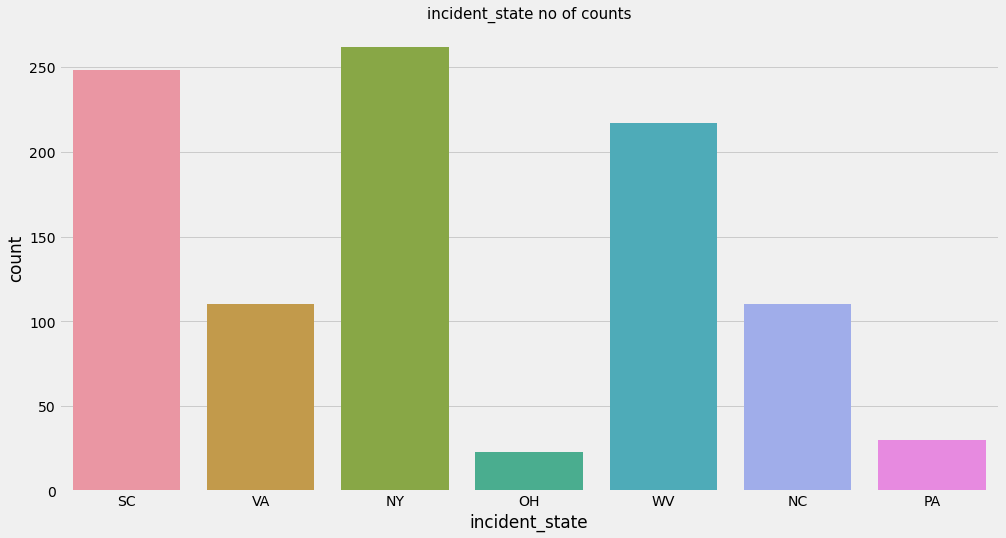

In [31]:
value_count(df,'incident_state')

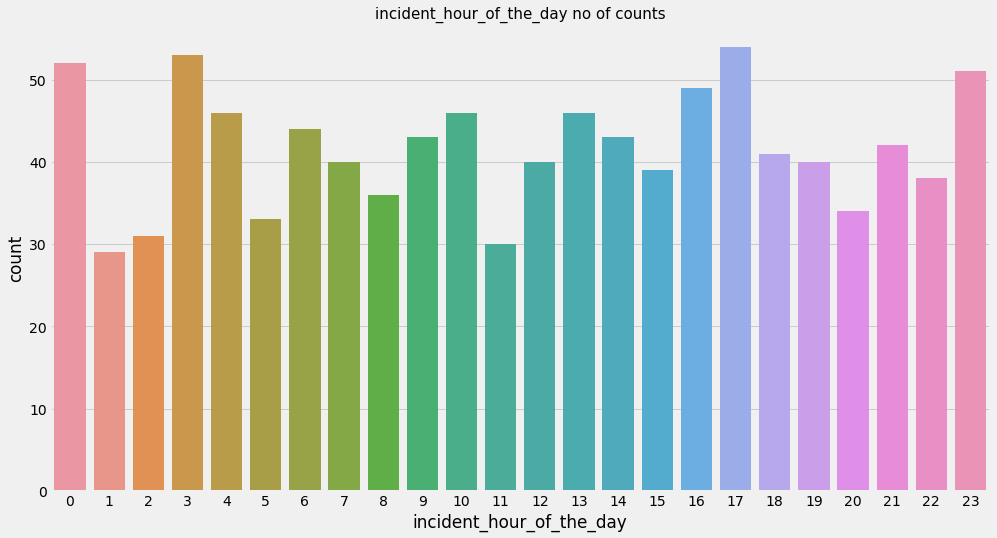

In [32]:
value_count(df,'incident_hour_of_the_day')

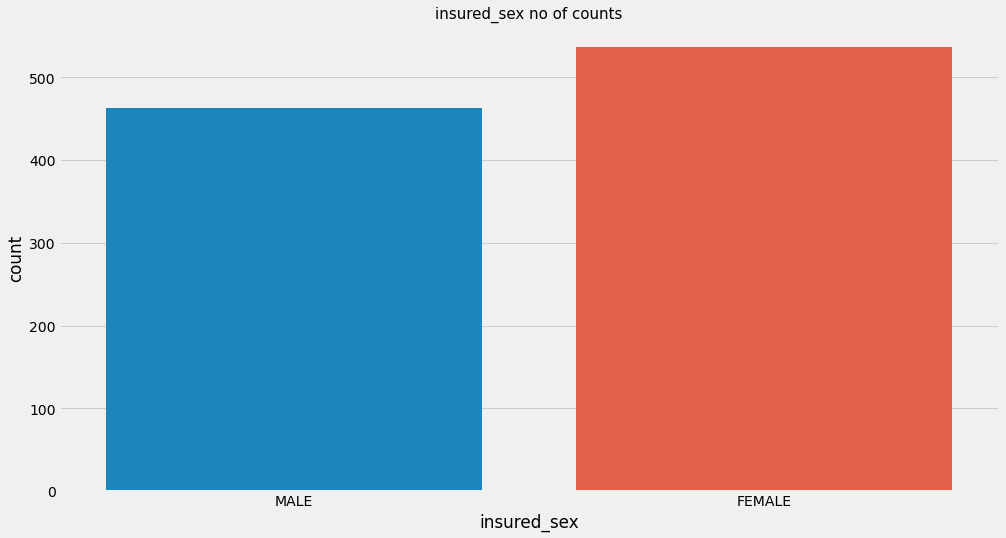

In [33]:
value_count(df,'insured_sex')

### Visualization with target col

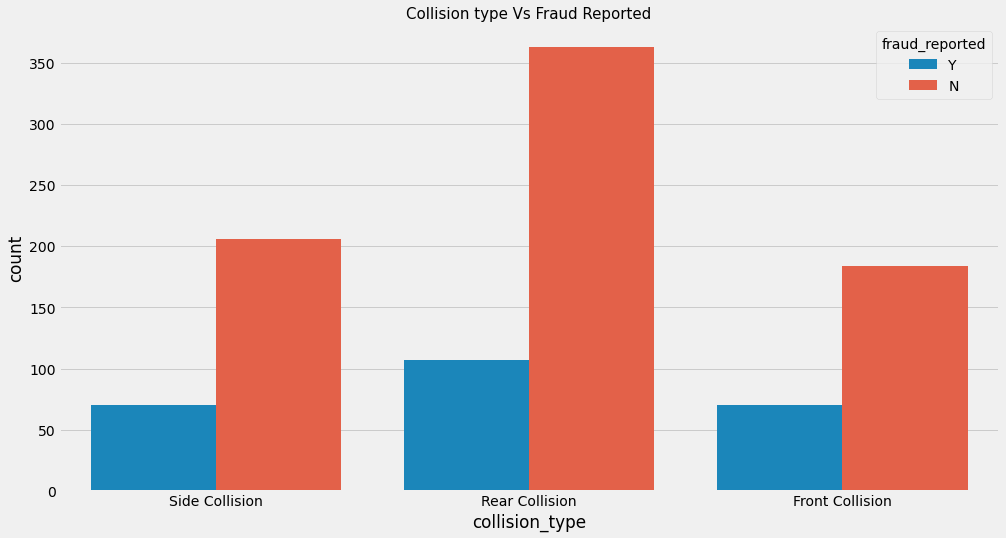

In [34]:
plt.figure(figsize=(15,8))
plt.title('Collision type Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['collision_type'],hue='fraud_reported',data=df);

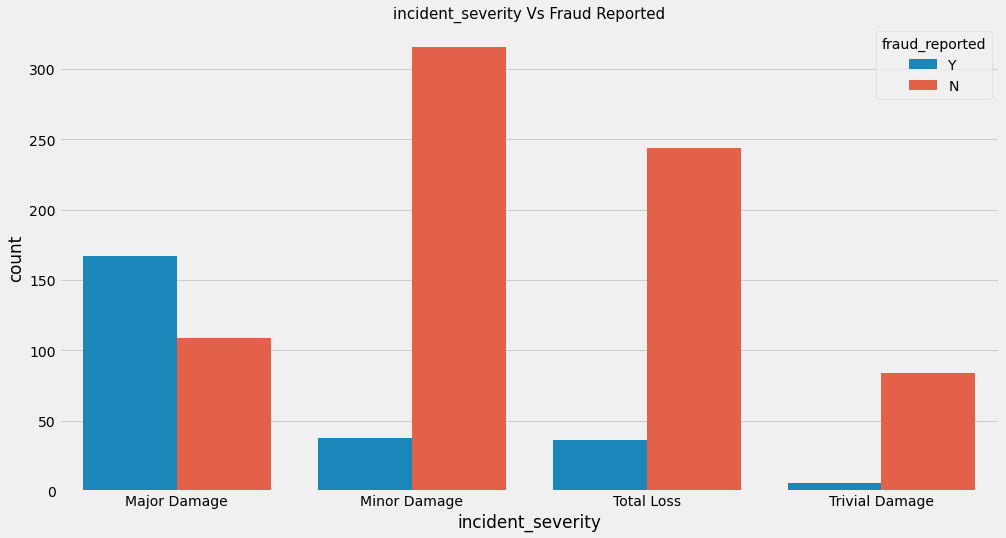

In [35]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['incident_severity'],hue='fraud_reported',data=df);

1-In mAjor damage case most of Fraud insurance claims reported.

2-In minor case we could see very least cases reported to froud as compared to number of cases reported of minor damage.

3- In trivial damage, lowest fraud reported.

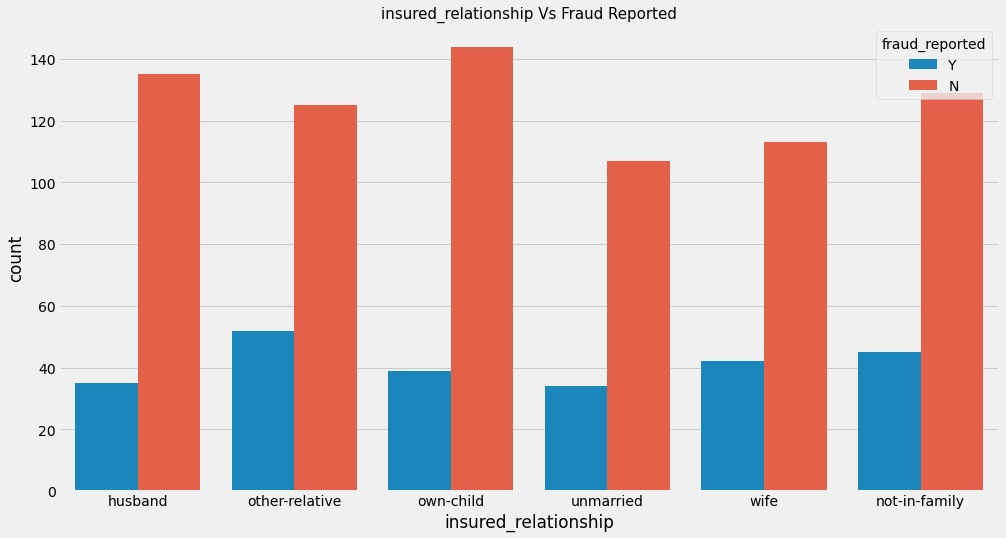

In [36]:
plt.figure(figsize=(15,8))
plt.title('insured_relationship Vs Fraud Reported',fontsize=15)
sns.countplot(df['insured_relationship'],hue='fraud_reported',data=df);

### Data Distribution Plot

In [37]:
df_n=df.select_dtypes(exclude='object')

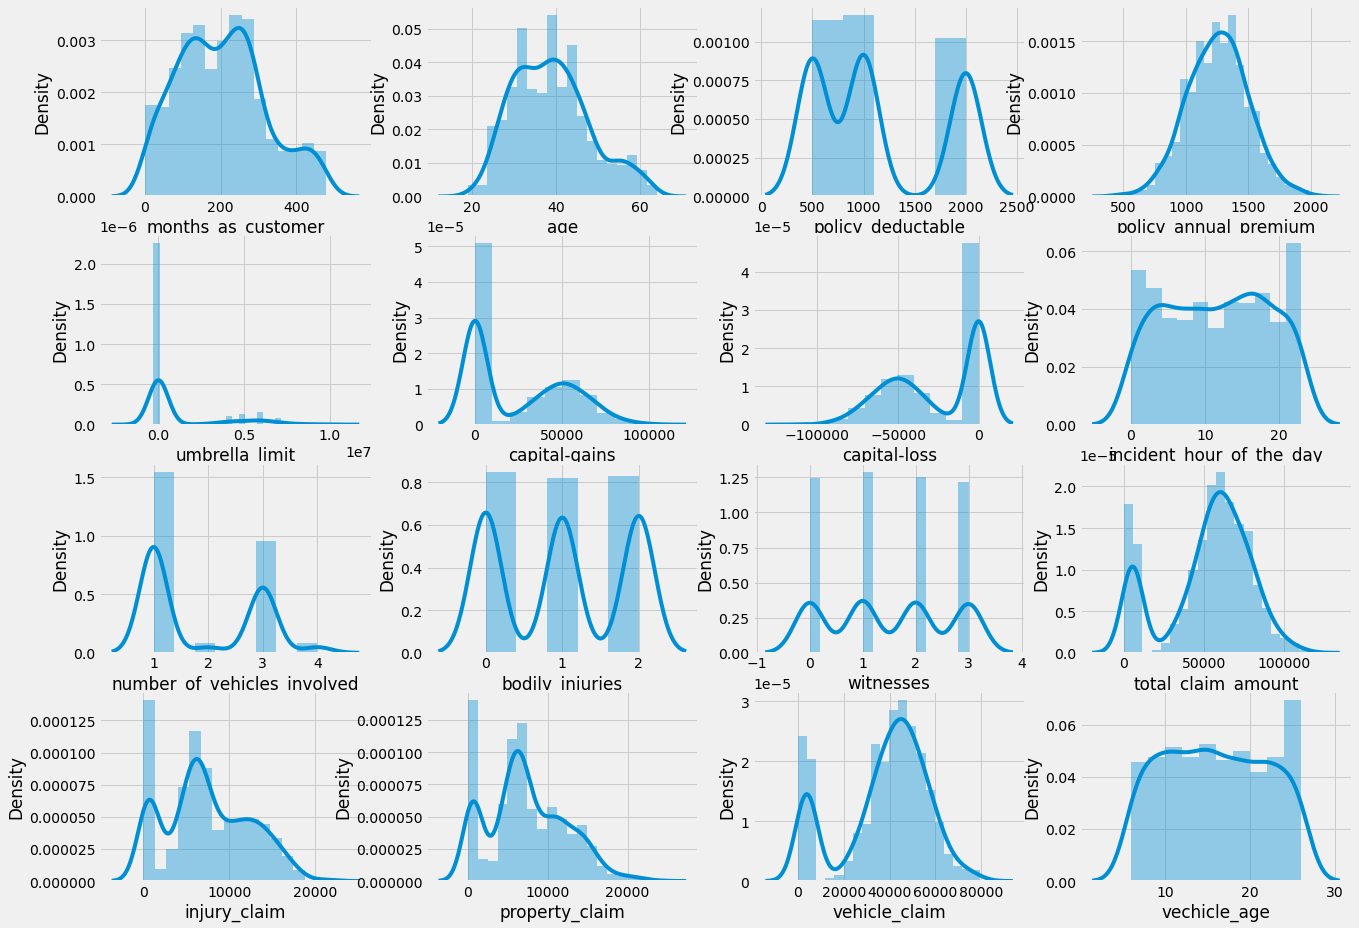

In [38]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
        plot=plot+1

### Outliers boxplot

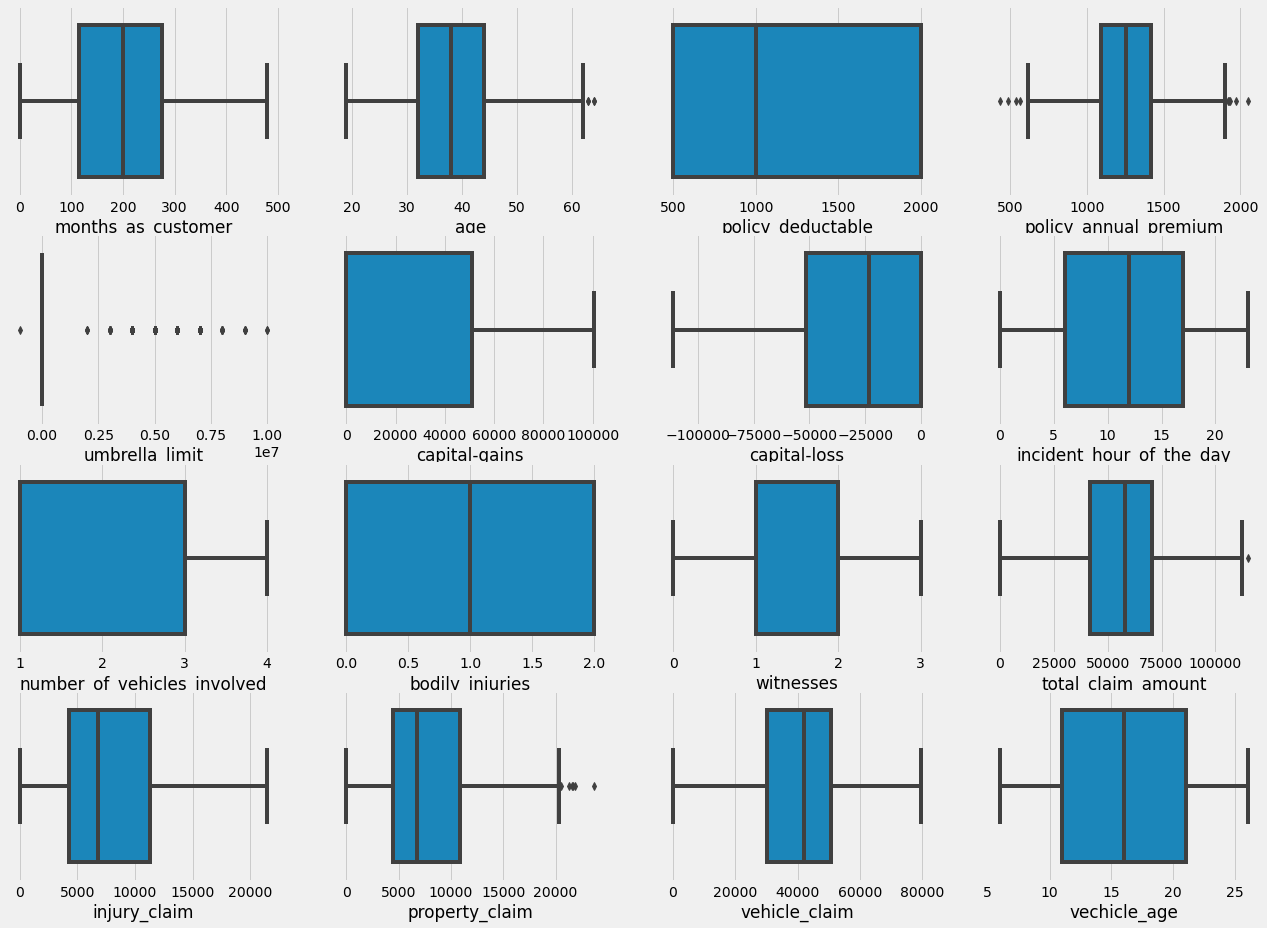

In [39]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.boxplot(df[i])
        plot=plot+1

### Skewness

In [40]:
## time to check skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
vechicle_age                   0.048289
dtype: float64

### Label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in do:
    df[i]=le.fit_transform(df[i])

In [42]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vechicle_age
0,328,48,1,1000,1406.91,0,1,4,2,17,...,2,1,71610,6510,13020,52080,10,1,1,17
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,1,14
2,134,29,0,2000,1413.14,5000000,0,6,11,2,...,3,0,34650,7700,3850,23100,4,30,0,14
3,256,41,1,2000,1415.74,6000000,0,6,1,2,...,2,0,63400,6340,6340,50720,3,34,1,7
4,228,44,2,1000,1583.91,6000000,1,0,11,2,...,1,0,6500,1300,650,4550,0,31,0,12


### correlation

In [43]:
df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
property_damage                0.017202
bodily_injuries                0.033877
witnesses                      0.049497
police_report_available       -0.027768


### Correlation Heatmapplot

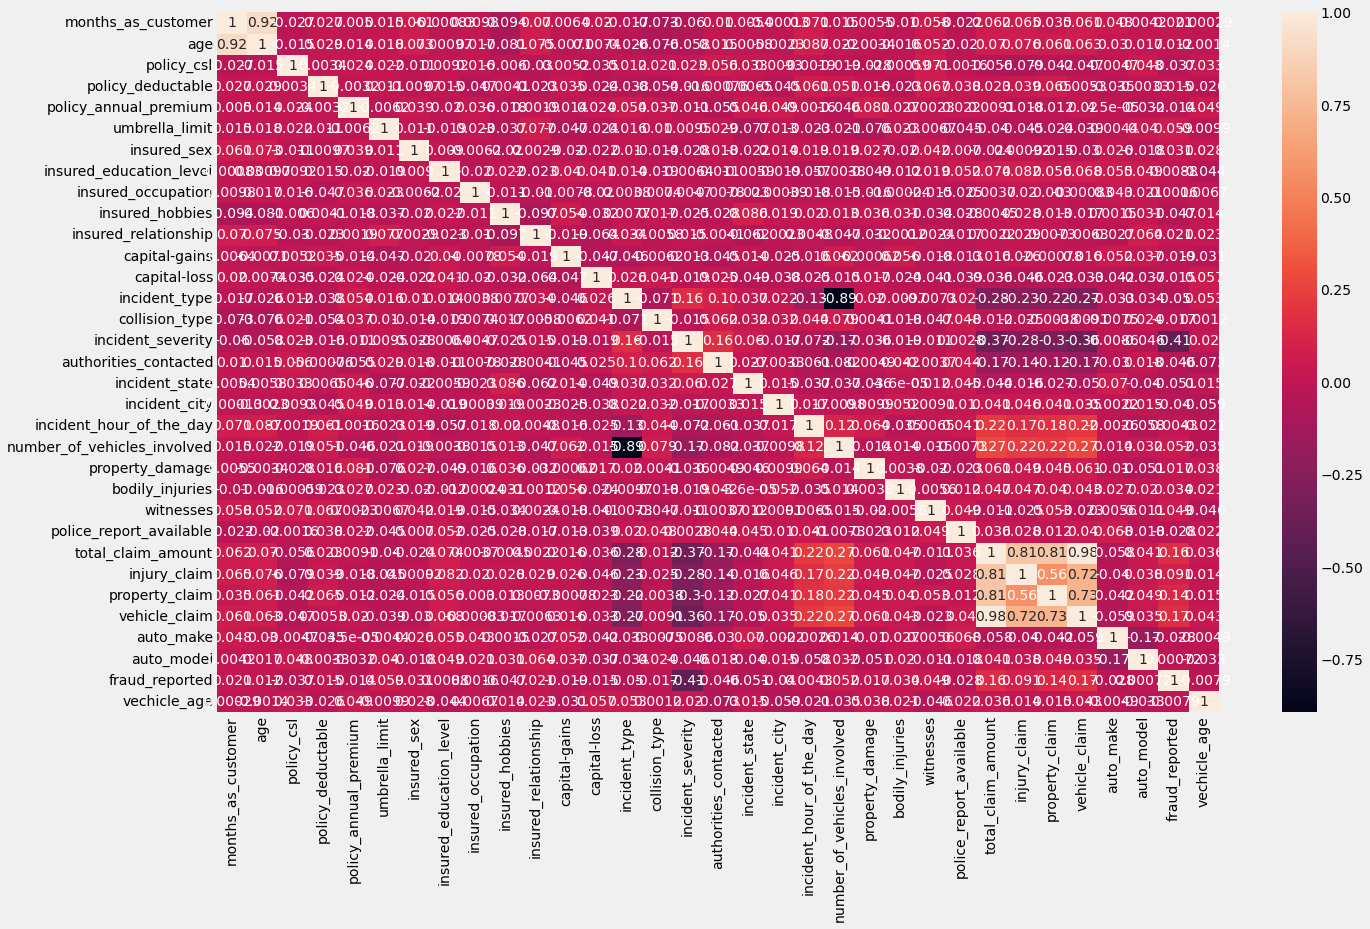

In [45]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True);

### Split the data in X and Y

In [46]:
x=df.drop(['fraud_reported'],axis=1)
y=df[['fraud_reported']]

### Standardization:

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,1.078140,0.990836,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,1.281737,...,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,0.183440
1,0.208995,0.334073,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,0.929078,...,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,-0.315491
2,-0.608002,-1.088913,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,-1.363201,...,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,-0.315491
3,0.452355,0.224613,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,-1.363201,...,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,-1.479664
4,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,0.576420,...,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,-0.149180
996,0.704407,0.224613,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,1.281737,...,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,-1.645974
997,-0.642767,-0.541611,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,-1.186872,...,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,1.513924
998,2.208028,2.523284,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,-1.715859,...,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,1.181303


### Feature Importance

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [49]:
print(extra.feature_importances_)

[0.02953293 0.02885993 0.02335427 0.02336353 0.02822556 0.02181244
 0.01718195 0.02802987 0.03352352 0.04007797 0.02693298 0.02646392
 0.0258874  0.01603222 0.02405097 0.1774633  0.0281123  0.02733424
 0.03026329 0.02800356 0.01677374 0.01669767 0.02454083 0.02484226
 0.017679   0.03274484 0.02979073 0.03180317 0.03523351 0.02910256
 0.0266306  0.02965494]


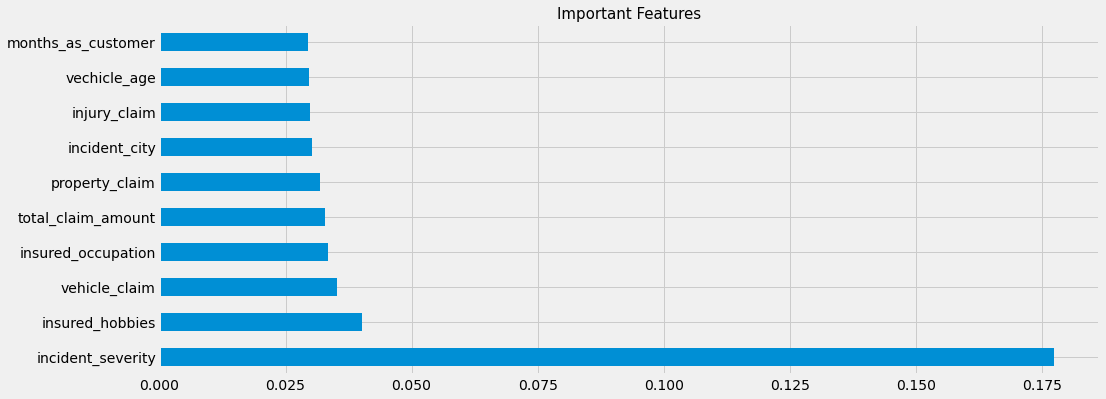

In [50]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

### create models

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc,plot_roc_curve
from imblearn.combine import SMOTEENN

In [52]:
#over sampling of our Data
sm=SMOTEENN()
x_resample,y_resample=sm.fit_resample(x,y)
x_resample

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
1,2.112422,2.413823,-1.182668,1.412784,-0.488623,-0.479476,-0.928546,-0.496015,-0.909377,1.105408,...,0.009759,0.461838,1.478078,2.355513,2.100350,2.131846,2.205407,-1.375206,-1.376214,-0.149180
2,-0.382024,-0.213229,1.304542,-1.039966,0.482754,-0.479476,-0.928546,0.530931,-1.158316,1.634395,...,0.009759,-1.338700,-0.676554,0.764280,-0.164686,1.215274,0.800509,-1.623169,1.229231,-1.645974
3,0.113389,0.224613,1.304542,1.412784,-1.562235,-0.479476,-0.928546,-1.522961,-0.162558,1.105408,...,0.009759,0.461838,-0.676554,-0.565475,-1.523707,-0.553587,-0.255284,-1.623169,1.049545,1.513924
4,0.461047,0.443534,-1.182668,1.412784,0.269187,-0.479476,1.076953,-0.496015,0.584261,-0.128897,...,0.009759,1.362107,1.478078,-1.657624,-1.187539,-1.364401,-1.661772,1.352393,-0.926999,0.017130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.497507,0.246544,-1.182668,-1.039966,0.342667,-0.479476,1.076953,1.146362,0.284998,-0.410581,...,0.009759,-1.158323,-0.676554,0.398480,0.834582,-0.341558,0.428611,-0.978198,0.132954,0.016832
839,-1.058442,-1.327865,0.513402,0.372545,0.368269,1.697980,1.076953,-0.822669,0.946551,0.368205,...,1.229693,0.707011,0.694151,0.030757,-0.459710,0.618349,0.003838,-0.879279,1.204764,0.001913
840,-0.000168,-0.041836,0.060937,-1.039966,0.987312,-0.479476,-0.361188,0.899142,0.020859,-0.072069,...,-1.210174,-0.183744,1.478078,-0.033085,0.410150,-0.556247,-0.010149,-1.375206,-1.376214,0.635322
841,-0.334147,-0.234350,1.144565,-0.274969,-0.322618,1.234478,-0.799553,-0.462988,-1.142305,-0.669226,...,1.229693,-0.438431,1.339492,-1.847214,-1.435195,-1.376164,-1.859794,1.568459,0.032380,-0.428316


In [53]:
y_resample

,fraud_reported
0,0
1,0
2,0
3,0
4,0
...,...
838,1
839,1
840,1
841,1


In [54]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

### Logistic Regression

max accuracy score corresponding to 84 is 92.89940828402366


cross validation score 77.39999999999999


Standard Deviation 2.8705400188814676


F1 score 92.52669039145907


Training accuracy 88.87240356083086


Test Accuracy 87.57396449704143


Confusion Matrix [[ 18  15]
 [  6 130]]


Classification Report               precision    recall  f1-score   support

           0       0.75      0.55      0.63        33
           1       0.90      0.96      0.93       136

    accuracy                           0.88       169
   macro avg       0.82      0.75      0.78       169
weighted avg       0.87      0.88      0.87       169



Roc_auc Score 75.0668449197861





84

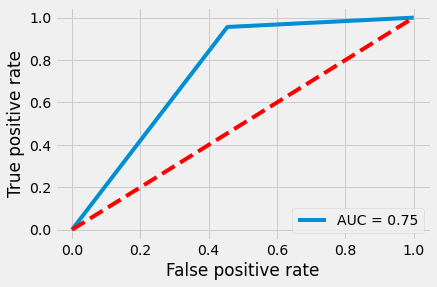

In [55]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

### Decision Tree

max accuracy score corresponding to 67 is 95.85798816568047


cross validation score 76.9


Standard Deviation 3.2649655434629006


F1 score 93.52517985611512


Training accuracy 100.0


Test Accuracy 89.3491124260355


Confusion Matrix [[ 21  12]
 [  6 130]]


Classification Report               precision    recall  f1-score   support

           0       0.78      0.64      0.70        33
           1       0.92      0.96      0.94       136

    accuracy                           0.89       169
   macro avg       0.85      0.80      0.82       169
weighted avg       0.89      0.89      0.89       169



Roc_auc Score 79.61229946524064





67

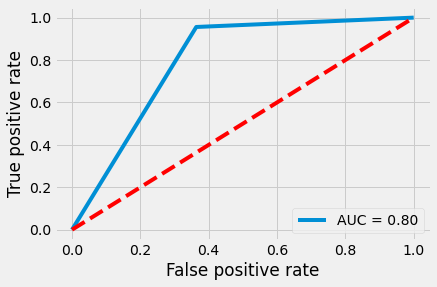

In [56]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

### KNN

max accuracy score corresponding to 57 is 91.71597633136095


cross validation score 71.69999999999999


Standard Deviation 2.5416530054277646


F1 score 93.79310344827586


Training accuracy 91.83976261127597


Test Accuracy 89.3491124260355


Confusion Matrix [[ 15  18]
 [  0 136]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.45      0.62        33
           1       0.88      1.00      0.94       136

    accuracy                           0.89       169
   macro avg       0.94      0.73      0.78       169
weighted avg       0.91      0.89      0.88       169



Roc_auc Score 72.72727272727273





57

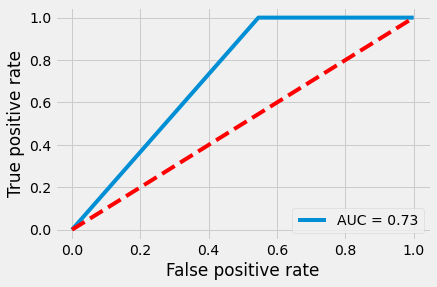

In [57]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

### Naive Bayes

max accuracy score corresponding to 95 is 92.3076923076923


cross validation score 72.09999999999998


Standard Deviation 4.8


F1 score 91.63636363636365


Training accuracy 86.64688427299704


Test Accuracy 86.3905325443787


Confusion Matrix [[ 20  13]
 [ 10 126]]


Classification Report               precision    recall  f1-score   support

           0       0.67      0.61      0.63        33
           1       0.91      0.93      0.92       136

    accuracy                           0.86       169
   macro avg       0.79      0.77      0.78       169
weighted avg       0.86      0.86      0.86       169



Roc_auc Score 76.62655971479502





95

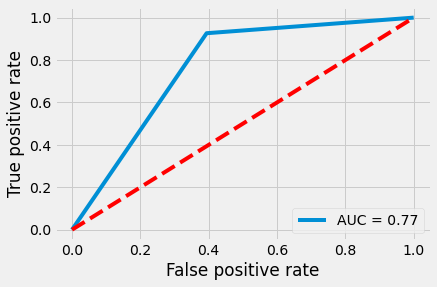

In [58]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

### Random Forest

max accuracy score corresponding to 67 is 95.26627218934911


cross validation score 77.4


Standard Deviation 1.4628738838327806


F1 score 95.07042253521126


Training accuracy 100.0


Test Accuracy 91.71597633136095


Confusion Matrix [[ 20  13]
 [  1 135]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.61      0.74        33
           1       0.91      0.99      0.95       136

    accuracy                           0.92       169
   macro avg       0.93      0.80      0.85       169
weighted avg       0.92      0.92      0.91       169



Roc_auc Score 79.93538324420678





67

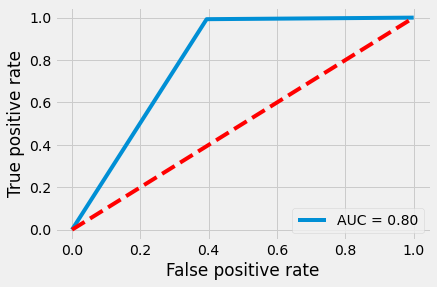

In [59]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

### Ada Boost

max accuracy score corresponding to 84 is 96.44970414201184


cross validation score 79.7


Standard Deviation 3.4146742157927736


F1 score 96.67896678966788


Training accuracy 97.92284866468842


Test Accuracy 94.67455621301775


Confusion Matrix [[ 29   4]
 [  5 131]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.97      0.96      0.97       136

    accuracy                           0.95       169
   macro avg       0.91      0.92      0.92       169
weighted avg       0.95      0.95      0.95       169



Roc_auc Score 92.1011586452763





84

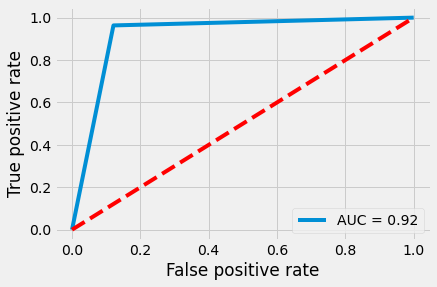

In [60]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

### Gardient Boost

max accuracy score corresponding to 59 is 98.22485207100591


cross validation score 81.5


Standard Deviation 2.709243436828811


F1 score 97.79411764705883


Training accuracy 100.0


Test Accuracy 96.44970414201184


Confusion Matrix [[ 30   3]
 [  3 133]]


Classification Report               precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.98      0.98      0.98       136

    accuracy                           0.96       169
   macro avg       0.94      0.94      0.94       169
weighted avg       0.96      0.96      0.96       169



Roc_auc Score 94.35160427807486





59

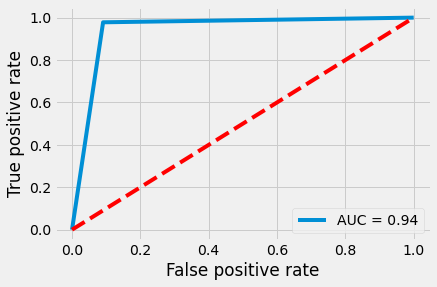

In [61]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

### Let's check ROC_AUC curve for fitted models:

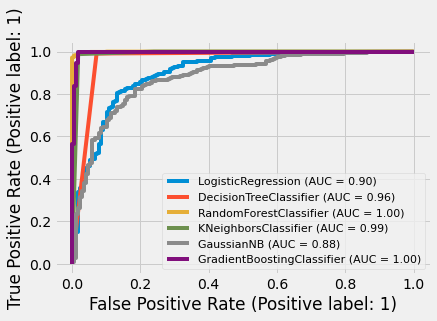

In [62]:
disp = plot_roc_curve(lr,x_resample,y_resample)
plot_roc_curve(dt,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(rf,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(knn,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gnb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gb,x_resample,y_resample,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

The AUC curve of Gradient Boosting Classifier and Random Forest Classifier has covered 100% area under the curve.

the accuracy score of Gradient Boosting Classifier and the difference of Accuracy Score and CV of Gradient Boosting Classifier is least, it's the best Model. Let's do Hyperparameter Tuning of Gradient Boosting Classifier.

In [63]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)

grid_param={
    "n_estimators":[12,13,15,17],
    "max_depth":range(4,12,2),
    "learning_rate":np.arange(0.1,1,0.1),
    "min_samples_split":range(4,8,2),
    "max_features":['auto', 'sqrt','log2']}

grid = GridSearchCV(gb,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.5,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 17}

In [64]:
gbdt_clf = GradientBoostingClassifier(max_depth=6,min_samples_split=4,learning_rate=0.5,max_features ='auto',n_estimators=17)
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    143.0  537.0       1.0      680.0         680.0
________________________________________________________________
 Confusion Matrix:
[[143   0]
 [  0 537]]


=======================Test Result===========================
Accuracy score:94.74%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.864865    0.970149  0.947368    0.917507      0.947984
recall      0.888889    0.962963  0.947368    0.925926      0.947368
f1-score    0.876712    0.966543  0.947368  

In [65]:
Report = classification_report(y_test,pred)
print(Report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.97      0.96      0.97       135

    accuracy                           0.95       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.95      0.95      0.95       171



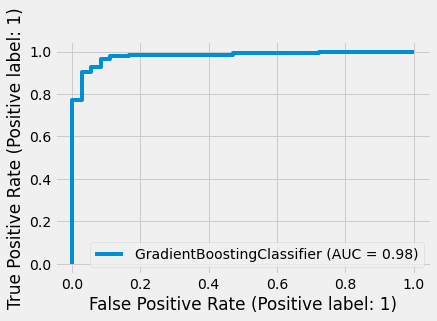

In [66]:
disp = plot_roc_curve(gbdt_clf,x_test,y_test)

### Saving The Model

In [67]:
import joblib
joblib.dump(gbdt_clf,'gbdt_insur_file.obj')

['gbdt_insur_file.obj']

### Loading The Model and Testing

In [68]:
gbdt_from_joblib=joblib.load('gbdt_insur_file.obj')
gbdt_from_joblib.predict(x_test)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])